## LAB 5 – SPATIAL FILTERING & CONVOLUTION




In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img1 = cv2.imread('image1.png')
img2 = cv2.imread('image2.png')

# Convert from BGR to RGB for display
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


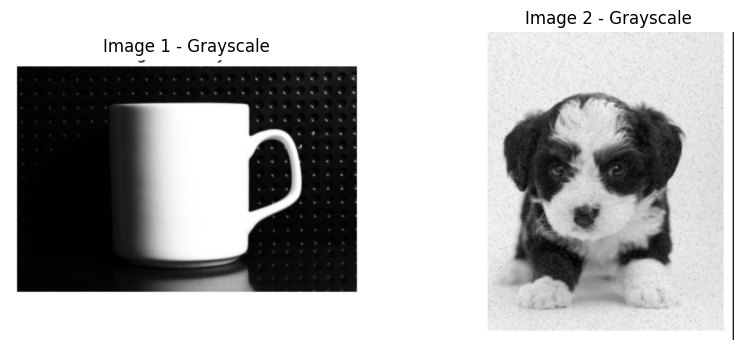

In [3]:
# converting to greyscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray1, cmap='gray')
plt.title("Image 1 - Grayscale")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray2, cmap='gray')
plt.title("Image 2 - Grayscale")
plt.axis('off')
plt.show()


In [4]:
# mean filter
mean1 = cv2.blur(gray1, (3,3))
mean2 = cv2.blur(gray2, (3,3))


In [5]:
# median filter
median1 = cv2.medianBlur(gray1, 3)
median2 = cv2.medianBlur(gray2, 3)


In [6]:
#guassian filter
gaussian1 = cv2.GaussianBlur(gray1, (3,3), 0)
gaussian2 = cv2.GaussianBlur(gray2, (3,3), 0)


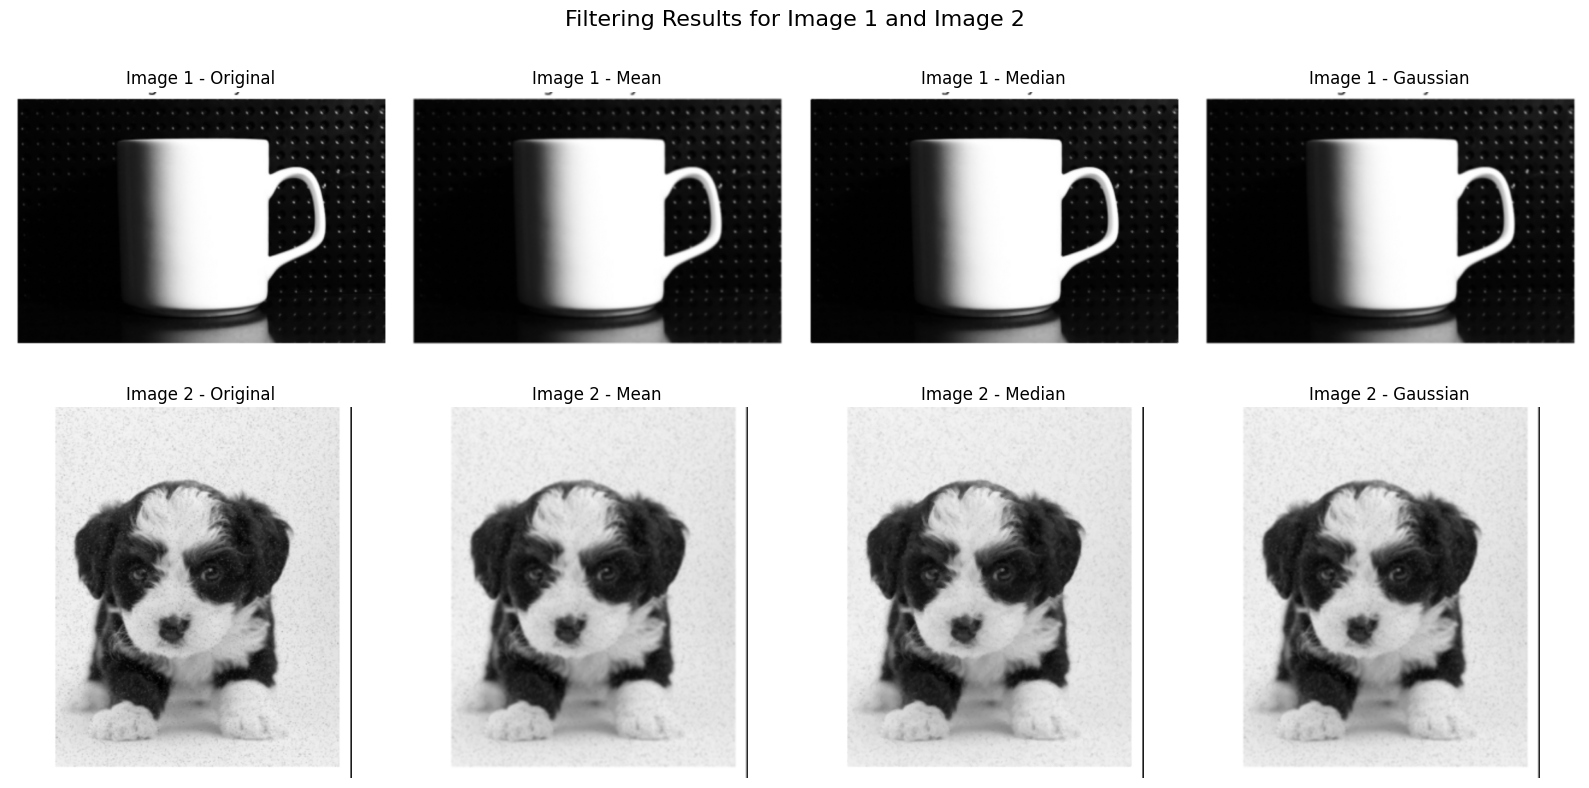

In [7]:
# display all filters

titles = ['Original', 'Mean', 'Median', 'Gaussian']

images1 = [gray1, mean1, median1, gaussian1]
images2 = [gray2, mean2, median2, gaussian2]

plt.figure(figsize=(16,8))

# Image 1 results
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(images1[i], cmap='gray')
    plt.title(f'Image 1 - {titles[i]}')
    plt.axis('off')

# Image 2 results
for i in range(4):
    plt.subplot(2,4,i+5)
    plt.imshow(images2[i], cmap='gray')
    plt.title(f'Image 2 - {titles[i]}')
    plt.axis('off')

plt.suptitle("Filtering Results for Image 1 and Image 2", fontsize=16)
plt.tight_layout()
plt.show()



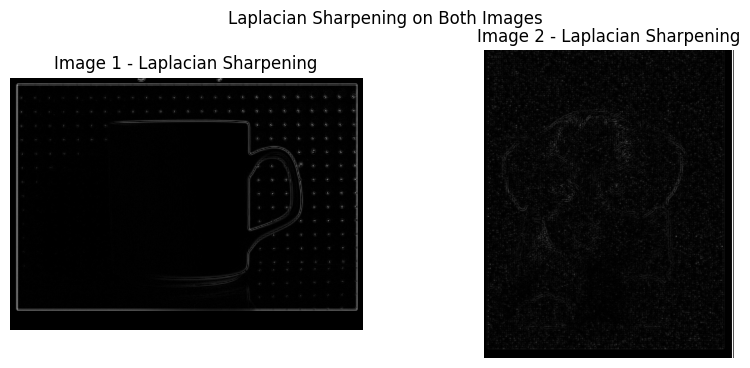

In [8]:
# laplacian filter sharpening

# Apply Laplacian
laplacian1 = cv2.Laplacian(gray1, cv2.CV_64F)
laplacian2 = cv2.Laplacian(gray2, cv2.CV_64F)

laplacian1 = cv2.convertScaleAbs(laplacian1)
laplacian2 = cv2.convertScaleAbs(laplacian2)

# Display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(laplacian1, cmap='gray')
plt.title("Image 1 - Laplacian Sharpening")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(laplacian2, cmap='gray')
plt.title("Image 2 - Laplacian Sharpening")
plt.axis('off')

plt.suptitle("Laplacian Sharpening on Both Images")
plt.show()


In [9]:
# Custom 3×3 Convolution Kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])



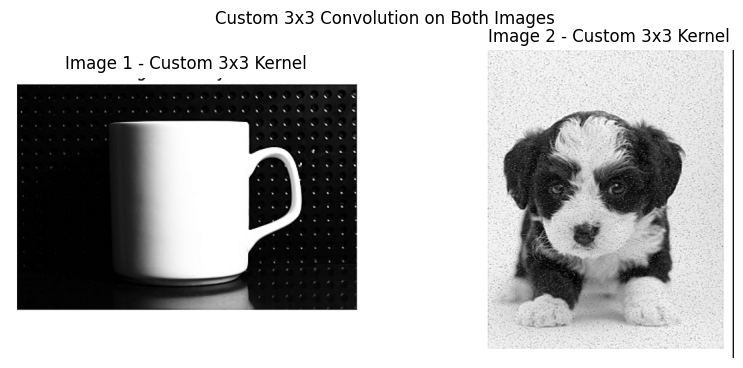

In [10]:
# Apply custom kernel
custom1 = cv2.filter2D(gray1, -1, kernel)
custom2 = cv2.filter2D(gray2, -1, kernel)

# Display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(custom1, cmap='gray')
plt.title("Image 1 - Custom 3x3 Kernel")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(custom2, cmap='gray')
plt.title("Image 2 - Custom 3x3 Kernel")
plt.axis('off')

plt.suptitle("Custom 3x3 Convolution on Both Images")
plt.show()


In [11]:
# noise function
def salt_pepper(img, prob=0.05):
    noisy = img.copy()
    rnd = np.random.rand(*img.shape)
    noisy[rnd < prob/2] = 0
    noisy[rnd > 1 - prob/2] = 255
    return noisy




In [12]:
# noise for both image

# Salt & Pepper Noise
sp1 = salt_pepper(gray1)
sp2 = salt_pepper(gray2)

# Gaussian Noise
gauss1 = gray1 + np.random.normal(0, 25, gray1.shape)
gauss2 = gray2 + np.random.normal(0, 25, gray2.shape)

gauss1 = np.clip(gauss1, 0, 255).astype(np.uint8)
gauss2 = np.clip(gauss2, 0, 255).astype(np.uint8)




In [13]:
# apply filters on noisy images

# salt & pepper noise

sp1_median = cv2.medianBlur(sp1, 3)
sp2_median = cv2.medianBlur(sp2, 3)

sp1_gaussian = cv2.GaussianBlur(sp1, (3,3), 0)
sp2_gaussian = cv2.GaussianBlur(sp2, (3,3), 0)


# guassian noise
g1_mean = cv2.blur(gauss1, (3,3))
g2_mean = cv2.blur(gauss2, (3,3))

g1_gaussian = cv2.GaussianBlur(gauss1, (3,3), 0)
g2_gaussian = cv2.GaussianBlur(gauss2, (3,3), 0)


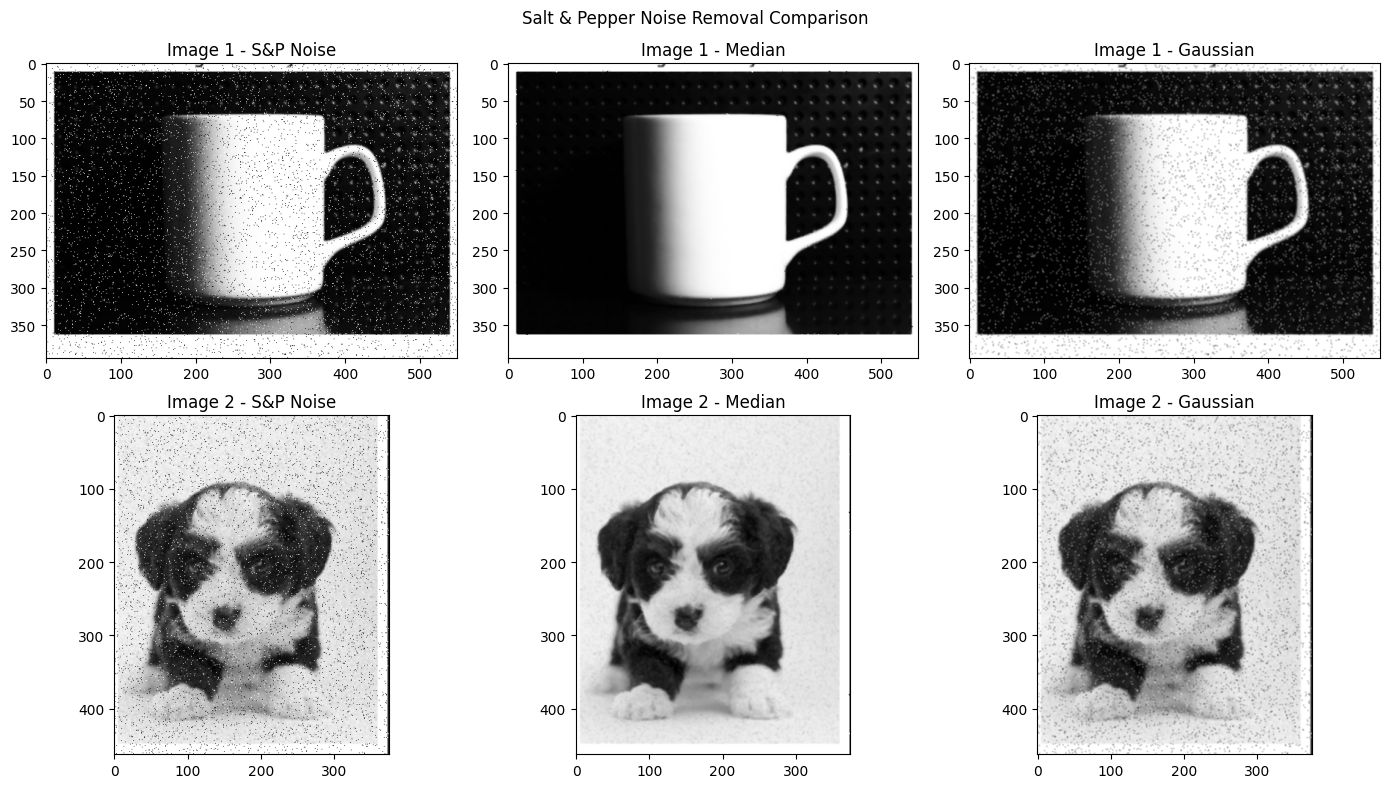

In [14]:
# Salt & Pepper Noise Comparison
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.imshow(sp1, cmap='gray')
plt.title("Image 1 - S&P Noise")

plt.subplot(2,3,2)
plt.imshow(sp1_median, cmap='gray')
plt.title("Image 1 - Median")

plt.subplot(2,3,3)
plt.imshow(sp1_gaussian, cmap='gray')
plt.title("Image 1 - Gaussian")

plt.subplot(2,3,4)
plt.imshow(sp2, cmap='gray')
plt.title("Image 2 - S&P Noise")

plt.subplot(2,3,5)
plt.imshow(sp2_median, cmap='gray')
plt.title("Image 2 - Median")

plt.subplot(2,3,6)
plt.imshow(sp2_gaussian, cmap='gray')
plt.title("Image 2 - Gaussian")

plt.suptitle("Salt & Pepper Noise Removal Comparison")
plt.tight_layout()
plt.show()


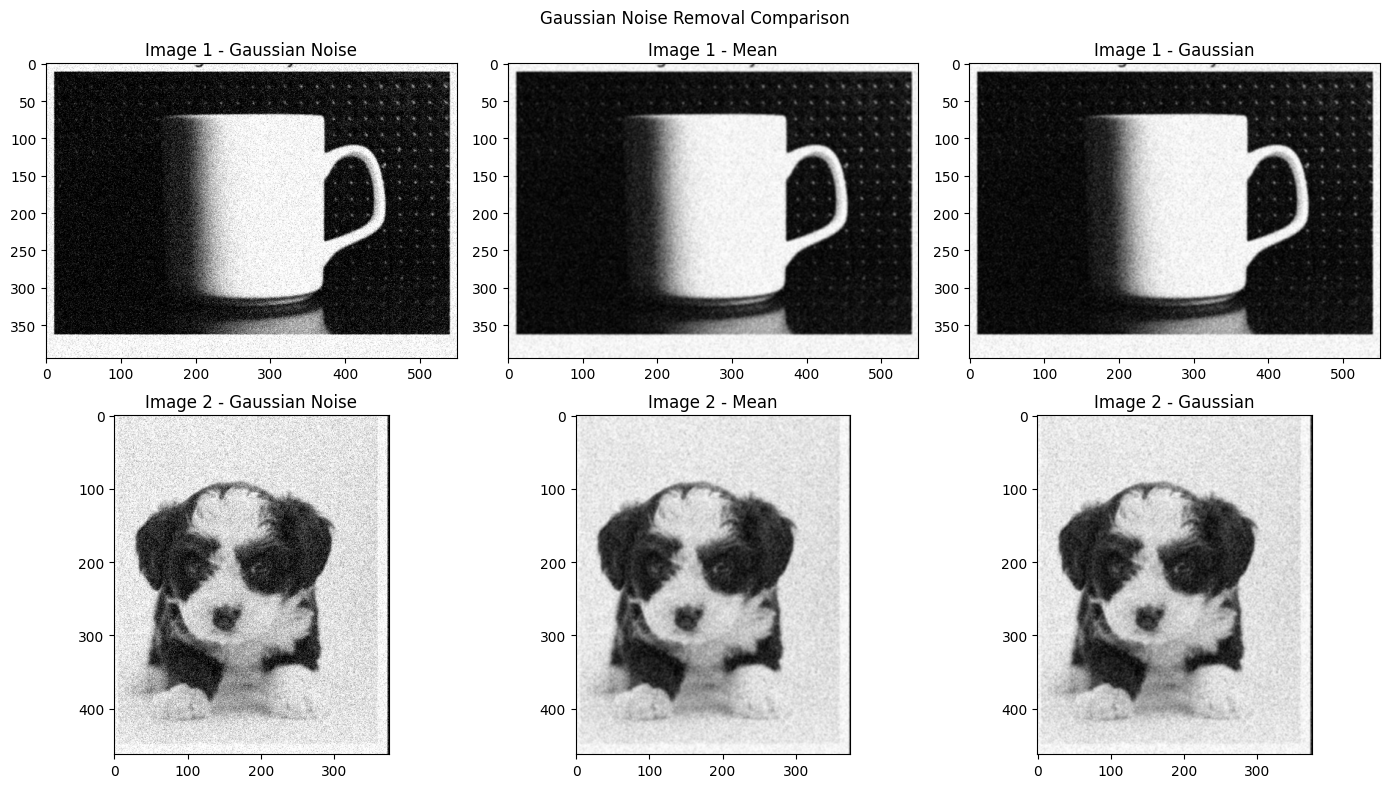

In [15]:
# Gaussian Noise Comparison
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.imshow(gauss1, cmap='gray')
plt.title("Image 1 - Gaussian Noise")

plt.subplot(2,3,2)
plt.imshow(g1_mean, cmap='gray')
plt.title("Image 1 - Mean")

plt.subplot(2,3,3)
plt.imshow(g1_gaussian, cmap='gray')
plt.title("Image 1 - Gaussian")

plt.subplot(2,3,4)
plt.imshow(gauss2, cmap='gray')
plt.title("Image 2 - Gaussian Noise")

plt.subplot(2,3,5)
plt.imshow(g2_mean, cmap='gray')
plt.title("Image 2 - Mean")

plt.subplot(2,3,6)
plt.imshow(g2_gaussian, cmap='gray')
plt.title("Image 2 - Gaussian")

plt.suptitle("Gaussian Noise Removal Comparison")
plt.tight_layout()
plt.show()

## Final Conclusion

Different noise types require different filtering techniques.

- The **median filter** is best suited for **impulse (salt & pepper) noise** because it removes extreme pixel values while preserving edges.
- The **Gaussian filter** is best suited for **Gaussian noise** as it smooths the image according to the noise distribution.
- Selecting the correct filter improves noise reduction while maintaining image quality.

---

## Overall Comparison Summary

| Noise Type | Best Filter | Reason |
|------------|------------|--------|
| Salt & Pepper Noise | Median Filter | Removes impulse noise and preserves edges |
| Gaussian Noise | Gaussian Filter | Matches noise distribution and smooths effectively |
| Mean Filter | Not optimal | Causes edge blurring |
| Laplacian Filter | Not for noise removal | Used for sharpening |
